In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

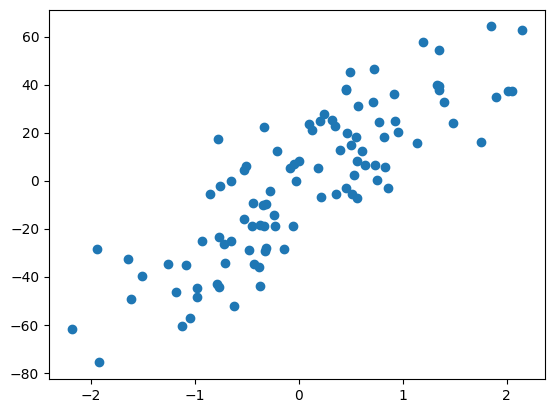

In [2]:
from sklearn.datasets import make_regression
# Create data
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, noise=20, n_targets=1, random_state=13)
# split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=13)
# plot data
plt.scatter(x, y)

In [3]:
# apply linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr = lr.fit(x_train, y_train)
print('lr_coef_ : ', lr.coef_)
print('lr_intercept_ : ', lr.intercept_)

lr_coef_ :  [28.14641458]
lr_intercept_ :  -2.5171658346421597


<ipython-input-6-4cc28ca110dd>:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  l.fit(x_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.139e+04, tolerance: 7.185e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


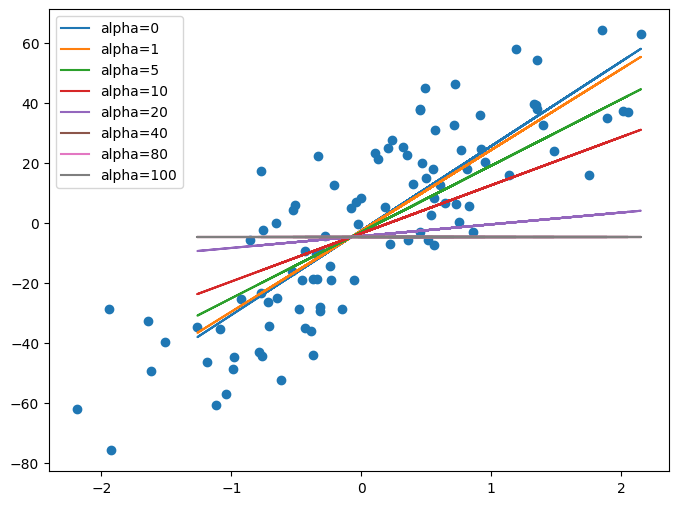

In [6]:
from sklearn.linear_model import Lasso
alphas = [0,1,5,10,20,40,80,100]
plt.figure(figsize=(8,6))
plt.scatter(x,y)
for i in alphas:
  l = Lasso(alpha=i)
  l.fit(x_train, y_train)
  plt.plot(x_test, l.predict(x_test), label='alpha={}'.format(i))
plt.legend()
plt.show()

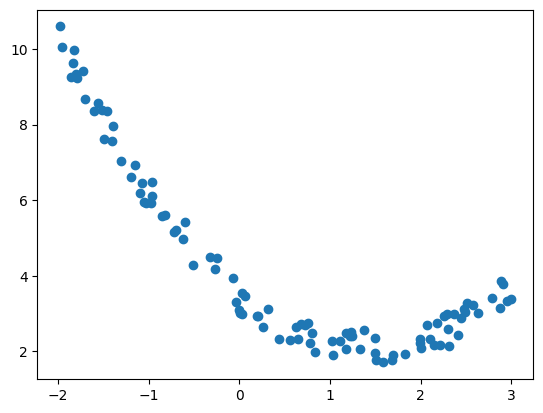

In [7]:
# Generate Non-Linear Dataset
m=100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 **2 - 2 * x1 + 3 + np.random.rand(m, 1)
# plot data
plt.scatter(x1, x2)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.792e+00, tolerance: 5.993e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coor

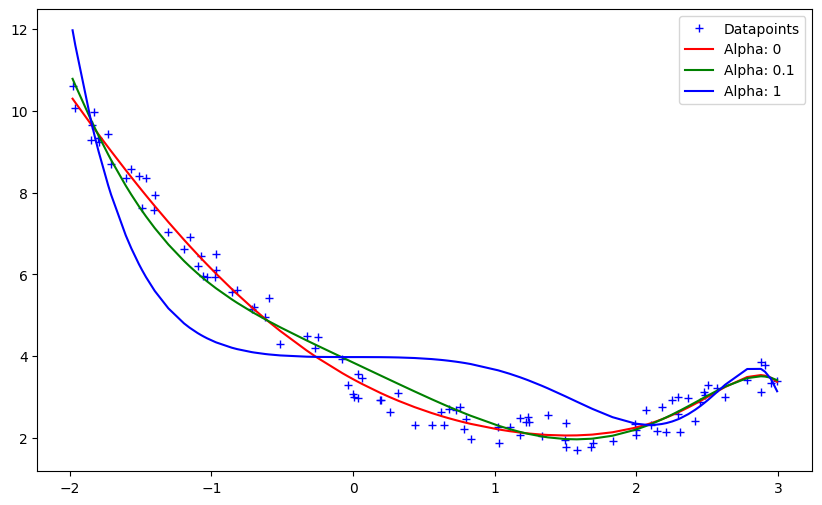

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso

# function for apply lasso regression
def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)
# different alpha value for check impact
alphas = [0, 0.1, 1]
# color for line
cs = ['r', 'g', 'b']
# plot graph
plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')
# loop for check alpha value impact on regression line drawing
for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

## How coefficient affected

In [15]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score

data=load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [18]:
# split data
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, random_state=13)
# apply Lasso and check different alpha value impact
coefs = []
r2_scores = []

for i in [0,0.1,1,10]:
    l = Lasso(alpha=i)
    l.fit(x_train,y_train)

    coefs.append(l.coef_.tolist())
    y_pred = l.predict(x_test)
    r2_scores.append(r2_score(y_test,y_pred))

<ipython-input-18-c2eb8d3225fc>:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  l.fit(x_train,y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.742e+05, tolerance: 2.037e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


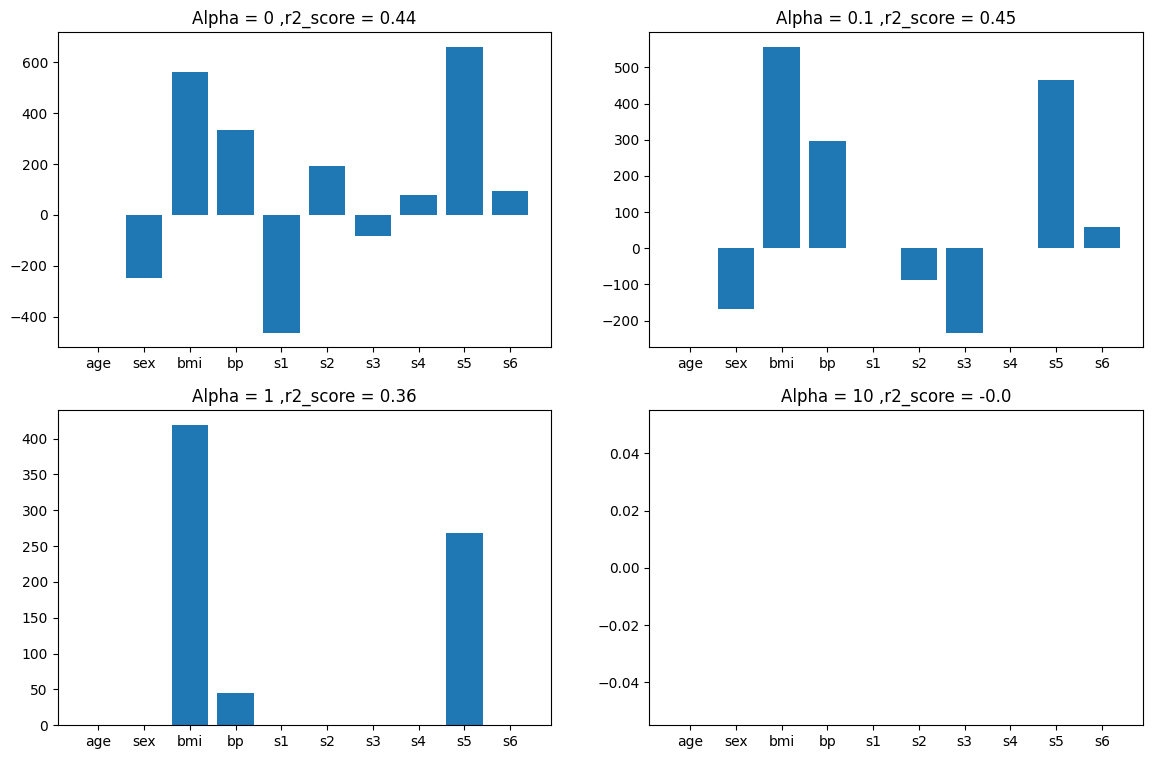

In [19]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 0.1 ,r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 1 ,r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2_scores[3],2)))

plt.show()

# Higher Coefficients are affected

In [21]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    l = Lasso(alpha=i)
    l.fit(x_train,y_train)

    coefs.append(l.coef_.tolist())

input_array = np.array(coefs)

coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

<ipython-input-21-d1a2e42d9bf6>:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  l.fit(x_train,y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.742e+05, tolerance: 2.037e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-1.542813,-248.574002,561.565284,332.492262,-463.089681,191.859554,-83.438417,76.518274,660.479740,93.948780
0.0001,-1.447559,-248.491714,561.644166,332.433003,-457.317543,187.212821,-85.923484,75.866330,658.325000,93.912112
0.0010,-0.590337,-247.751088,562.353868,331.899693,-405.389442,145.408962,-108.279555,70.001416,638.940194,93.582110
0.0100,0.000000,-239.731861,564.126362,327.824166,-207.547441,-0.000000,-199.061271,30.224150,567.954358,91.361540
0.1000,0.000000,-169.129961,557.541619,295.777234,-0.000000,-86.916215,-234.139444,0.000000,465.839999,59.578337
1.0000,0.000000,-0.000000,418.473245,45.303247,0.000000,0.000000,-0.000000,0.000000,268.556157,0.000000
10.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
100.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
1000.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
